## Import libraries

In [2151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

## Read and Understand DataSet

In [2152]:
df = pd.read_csv("day.csv")

In [2153]:
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [2154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

#### Missing Value Check
    None of the columns have any missing values. Hence missing value treatment is not required.

#### Column CleanUp - Drop columns
    instant(as it record index)
    dteday(as we have all data in other columns)
    casual and registered(as we are going to consider only cnt)

In [2155]:
df.drop(['instant','casual','registered','dteday'], axis='columns', inplace=True)

## Exploratory Data Analysis

#### Check correlation amoung features

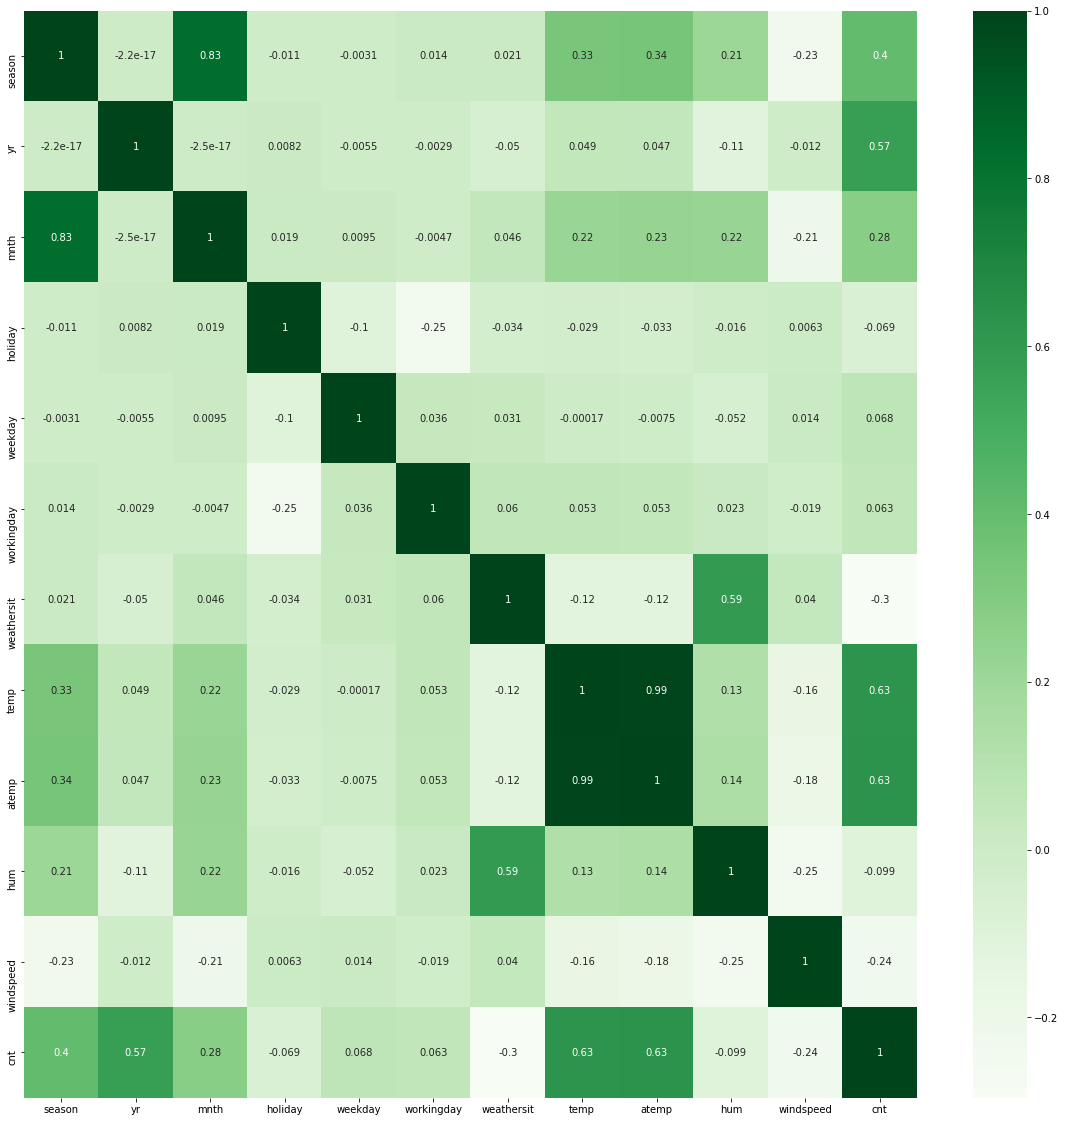

In [2156]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

#### Relationship of Target variable(cnt) with independent variables 
    Positive correlation with temp, atemp, yr, season. 
    Negative correlation with windspeed.

#### Relationship between independent variables
    Humidity and weathersit
    Season and month(logical)
    Temp & atemp with season and month
    Temp and atemp are correlated.

In [2157]:
#df['weekend']=df['weekday'].map({0:'Yes',6:'Yes',1:'No',2:'No',3:'No',4:'No',5:'No'})

In [2158]:
#df['yr']=df['yr'].map({1:'2019',0:'2018'})

In [2159]:
#df['holiday']=df['holiday'].map({0:'No',1:'Yes'})

In [2160]:
#df['workingday']=df['workingday'].map({0:'No',1:'Yes'})

#### Update categorical feature columns by providing meaningful categories

In [2161]:
df['season'] = df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [2162]:
df['mnth']=df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [2163]:
df['weekday']=df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [2164]:
df['weathersit']=df['weathersit'].map({1:'Good',2:'Moderate',3:'Bad',4:'Worst'})

In [2165]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis on Numerical Columns

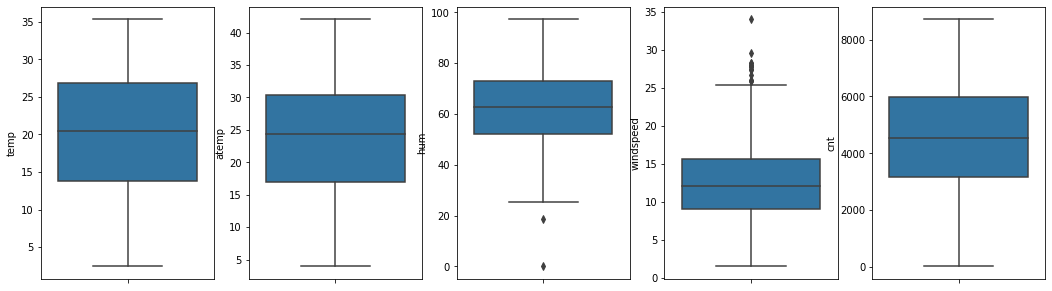

In [2166]:
cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']

plt.figure(figsize=(18,5))
i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=df)
    i=i+1

Comparing spread of temp and atemp on same scale.

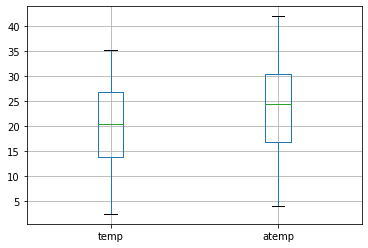

In [2167]:
df.boxplot(['temp','atemp'])

#### Observation : 
    atemp has higher percentiles as compared to temp.
    Outliers are present for humidity and windspeed columns

### Outlier Analysis & Treatment

In [2168]:
hum_lf=df['hum'].quantile(0.25)-1.5*(df['hum'].quantile(0.75)-df['hum'].quantile(0.25))
hum_lf

20.515637499999997

In [2169]:
winsp_uf=df['windspeed'].quantile(0.75)+1.5*(df['windspeed'].quantile(0.75)-df['windspeed'].quantile(0.25))
winsp_uf

25.501498124999998

In [2170]:
df.loc[df['hum'] < hum_lf,'hum']

49    18.7917
68     0.0000
Name: hum, dtype: float64

Dropping row with index 68 where the humidity is 0 as humidity can never be zero

In [2171]:
df = df.drop([df.index[68]])

In [2172]:
df.loc[df['hum'] < hum_lf,'hum']=hum_lf

In [2173]:
df.loc[df['windspeed'] > winsp_uf,'windspeed']

44     27.999836
49     34.000021
93     25.833257
94     26.000489
292    28.292425
382    27.833743
407    27.417204
420    28.250014
431    29.584721
432    27.791600
449    25.917007
665    26.666536
720    27.292182
Name: windspeed, dtype: float64

In [2174]:
df.loc[df['windspeed'] > winsp_uf,'windspeed']=winsp_uf

### PairPlot to visulaze relationship between variables

<Figure size 1440x1080 with 0 Axes>

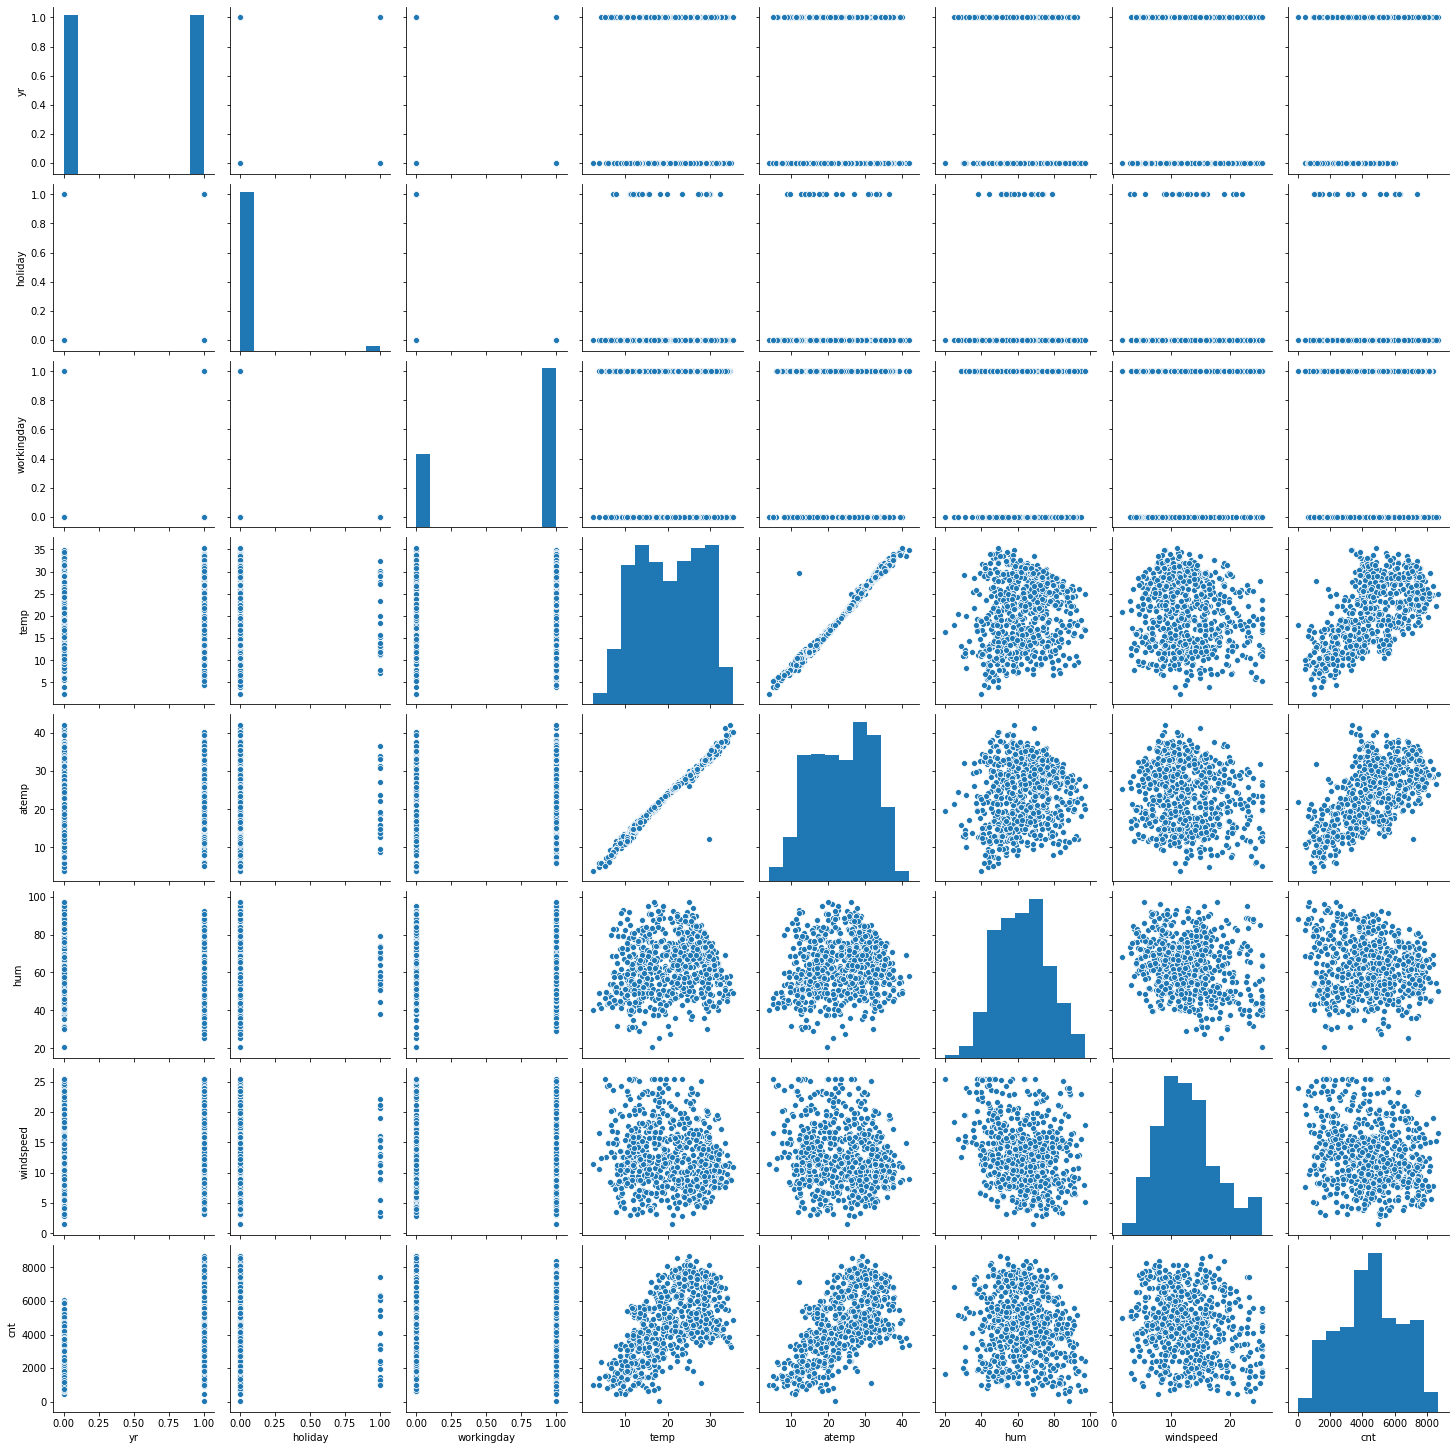

In [2175]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

#### Observation :
    Linear relationship of temp and atemp with target variable cnt
    Strong linear relationship between temp and atemp, as we had observed high correlation between these two in heatmap.
Let's further visulaze these using regplot

### RegPlots on numerical columns against target variable cnt.

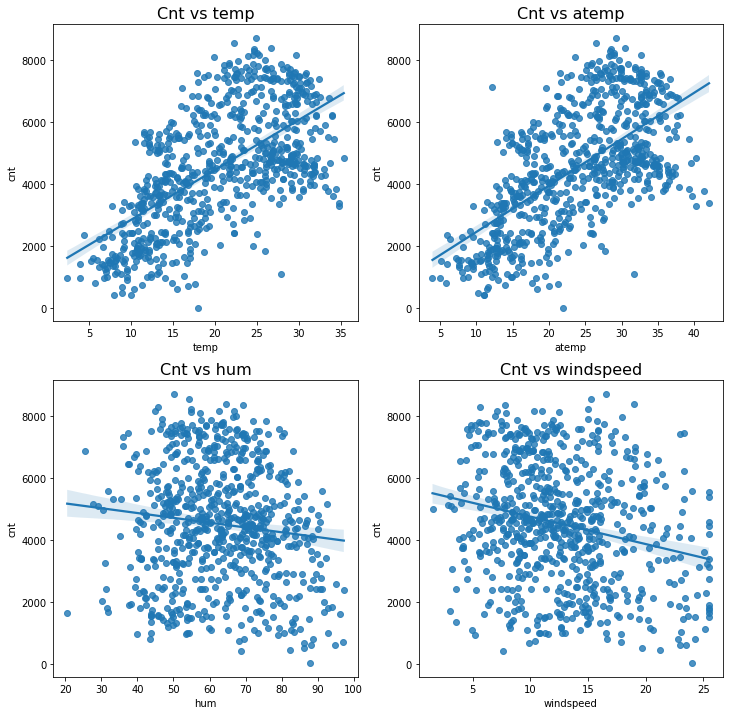

In [2176]:
cols = ['temp', 'atemp','hum', 'windspeed']

plt.figure(figsize=(12,12))
i = 1
for col in cols:
    plt.subplot(2,2,i)
    sns.regplot(data=df,y="cnt",x=col)
    plt.title("Cnt vs " + col,fontsize=16)
    plt.xlabel(col)
    i=i+1

#### Observation
    Linear relationship of temp and atemp with target variable cnt
    Count decreases with humidity
    Count decreases with windspeed

### Boxplot for Categorical Variables

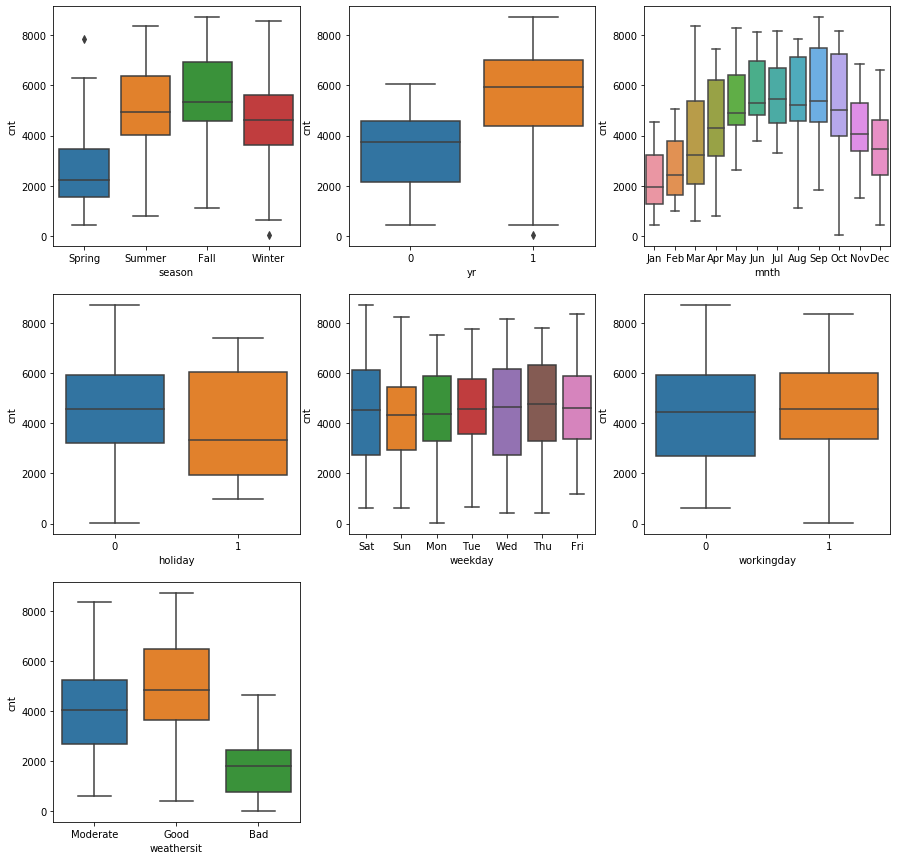

In [2177]:
cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

Let's plot bar plots for various feature combinations.

#### Bar Plot between count and month over years.

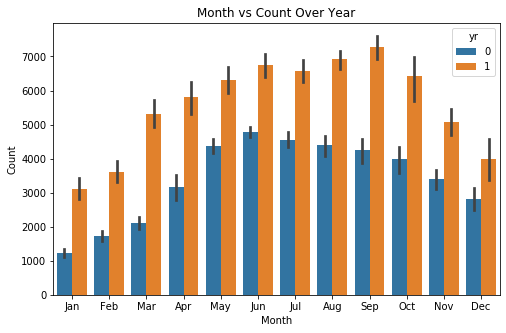

In [2178]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='mnth', y='cnt', hue="yr", data=df, estimator=np.mean)
ax.set_title('Month vs Count Over Year')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
plt.show()

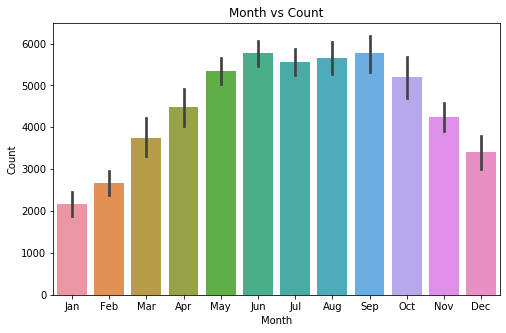

In [2179]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='mnth', y='cnt', data=df, estimator=np.mean)
ax.set_title('Month vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Month')
plt.show()

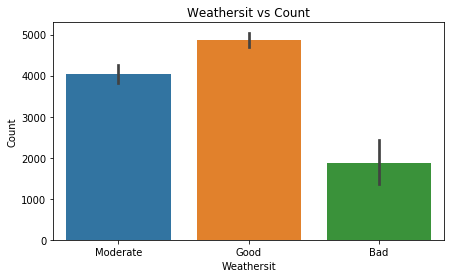

In [2180]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean)
ax.set_title('Weathersit vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Weathersit')
plt.show()

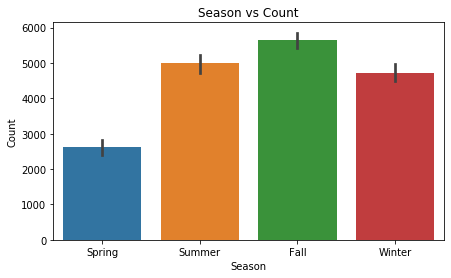

In [2181]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='season', y='cnt', data=df, estimator=np.mean)
ax.set_title('Season vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Season')
plt.show()

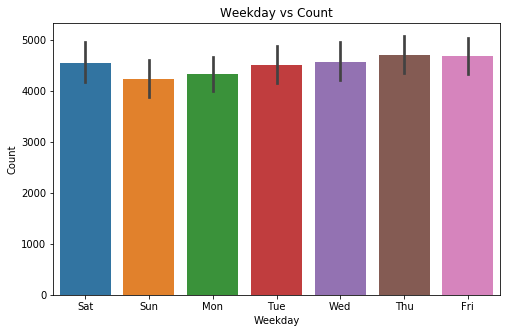

In [2182]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='weekday', y='cnt', data=df, estimator=np.mean)
ax.set_title('Weekday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Weekday')
plt.show()

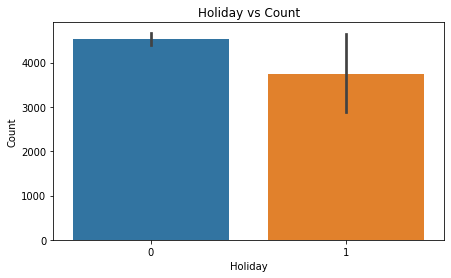

In [2183]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='holiday', y='cnt', data=df, estimator=np.mean)
ax.set_title('Holiday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Holiday')
plt.show()

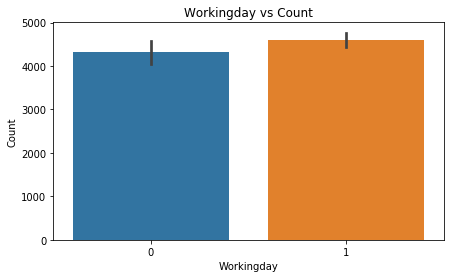

In [2184]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='workingday', y='cnt', data=df, estimator=np.mean)
ax.set_title('Workingday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Workingday')
plt.show()

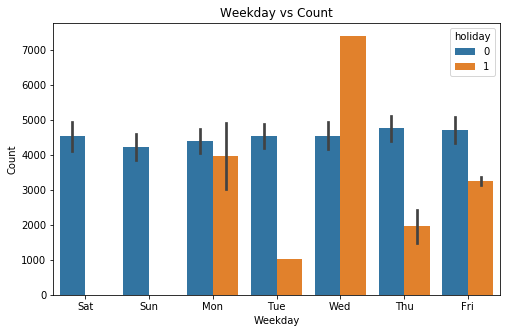

In [2185]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='weekday', y='cnt',hue='holiday', data=df,estimator=np.mean)
ax.set_title('Weekday vs Count')
ax.set_ylabel('Count')
ax.set_xlabel('Weekday')
plt.show()

#### Observation : All categorical variables
    Year - Demand has significantly increased in the year 2019 compared to 2018
    Season - Demand is high during Fall, followed by Summer, Winter and least during Spring
    Weather Situation - Demand is high when weather condition is good i.e. clear sky, and decreases as it gets mist and cloudy and further decreases during rain and snow.
    Month - Demand is high during the months of Jun, July, Aug and Sept.
    Holiday - Demand decreases during a holiday. It is high during working days.

### Create Dummy Variables

In [2186]:
df = pd.get_dummies(data=df,columns=['season','weathersit','mnth','weekday'],drop_first=True)

In [2187]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Good', 'weathersit_Moderate', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Split data into train and test

In [2188]:
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [2189]:
y=df.pop('cnt')
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### RFE - Recursive Feature Elimination

In [2190]:
lm = LinearRegression()

In [2191]:
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [2192]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', False, 8),
 ('windspeed', False, 6),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 20),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 16),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 11),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 18),
 ('weekday_Wed', False, 19)]

In [2193]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'weathersit_Good', 'weathersit_Moderate', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sat'],
      dtype='object')

In [2130]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [2194]:
cols=['yr', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'weathersit_Good', 'weathersit_Moderate', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sat']

### Build Model

In [2195]:
def build_model(cols,X_train):
    X_train = X_train[cols]
    import statsmodels.api as sm
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())

In [2196]:
def calculate_vif(cols,X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = X_train[cols]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [2197]:
build_model(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.92e-185
Time:                        17:30:39   Log-Likelihood:                -277.15
No. Observations:                 510   AIC:                             576.3
Df Residuals:                     499   BIC:                             622.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7425    

In [2198]:
calculate_vif(cols,X_train)

              Features   VIF
5      weathersit_Good  5.19
1           workingday  4.19
3        season_Spring  3.33
6  weathersit_Moderate  3.33
2                 temp  2.84
4        season_Winter  2.13
0                   yr  2.09
9          weekday_Sat  1.67
7             mnth_Jul  1.40
8             mnth_Sep  1.19


In [2199]:
#cols=['yr', 'season_Spring', 'weathersit_Good']

In [2200]:
build_model(cols,X_train)
calculate_vif(cols,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.92e-185
Time:                        17:30:40   Log-Likelihood:                -277.15
No. Observations:                 510   AIC:                             576.3
Df Residuals:                     499   BIC:                             622.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7425    

## Residual Analysis

In [2201]:
X_train = X_train[cols]
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.92e-185
Time:                        17:30:40   Log-Likelihood:                -277.15
No. Observations:                 510   AIC:                             576.3
Df Residuals:                     499   BIC:                             622.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7425    

In [2202]:
y_train_pred = lm.predict(X_train)

In [2203]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

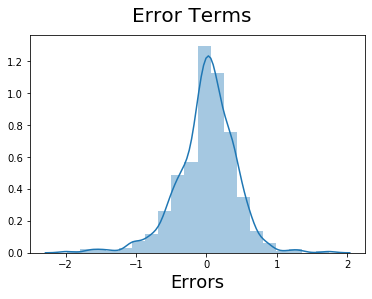

In [2204]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [2205]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test = sm.add_constant(X_test)
X_test = X_test[X_train.columns]

# Adding a constant variable 


In [2206]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

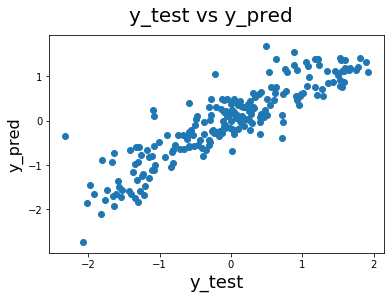

In [2207]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [2208]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [2209]:
print('Test')
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Test
Mean_Squared_Error : 0.19133507666114846
r_square_value : 0.7986149047405462


In [2210]:
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

In [2211]:
print('Train')
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Train
Mean_Squared_Error : 0.17359623386737283
r_square_value : 0.8299211818800487


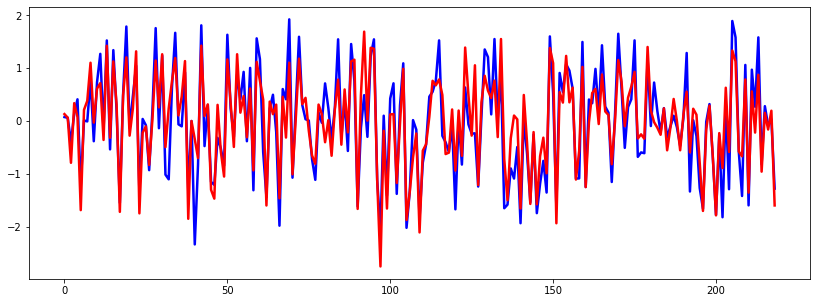

In [2212]:
c = [i for i in range(0,219,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")

Text(0, 0.5, 'Counts - Predicted Counts')

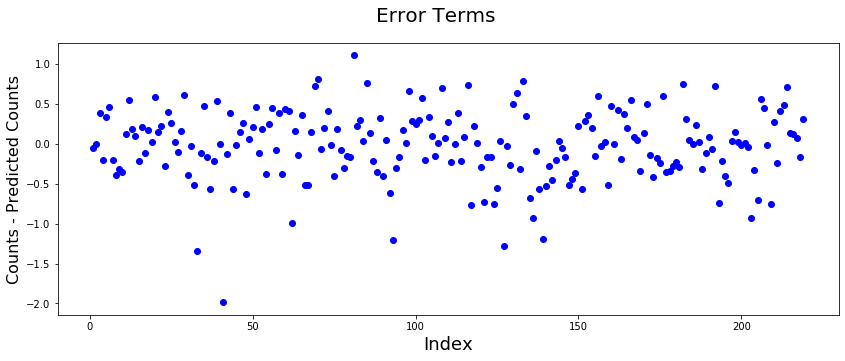

In [2213]:
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label